## NOTEBOOK: Importing dataset and Cleaning Notebook

Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.simplefilter('ignore')

Importing dataset

In [2]:
df = pd.read_csv('../data/raw/ehresp_2014.csv')
df.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [4]:
df.shape

(11212, 39)

### Create Binary Classes from BMI info

In [3]:
# Create obese category

df["obese"] = 0
df['bmi'] = df['erbmi'].astype(float)

# Set obese to true if BMI > 30
df.loc[df['bmi']>30, 'obese']= 1


### Selecting Features of Interest and Renaming them 
- 17 features of interest, related to choices of individuals

In [23]:
# Select columns of interest from original CSV
cols = ['ertpreat','ertseat','euexfreq','eufastfdfrq',
        'eudietsoda','eusoda','eudrink','eueat',
        'euexercise','eufastfd','euffyday',
       'eugroshp','eumeat','eumilk','euprpmel','eustores','eugenhth','obese']

# Rename these columns, to make it more understandable 
newlabels= ['timeEat','timeSnack','exerciseFreq','fastfdFreq',
            'sodaType','soda','beverages','snacking',
            'exercise','fastfd','buyfd',
           'shop','meat','milk','prepareMeal','storeLoc','genHealth', 'obese']

# Subset dataframe with columns of interest
df = df[cols]
df.columns = newlabels



### A Subset of fewer features
- _genhealth_ = Perceived overall health of individual 
- _timeEat_ = minutes spent eating (primary meals)
- _timeSnack_ = minutes spent eating non-primary meals (snack)
- _fastfdFreq_ = frequency of buying food (takeouts/delivery) the past 7 days
- _exerciseFreq_ = frequency of exercise/physical activity the past 7 days

In [24]:
df = df[['genHealth', 'timeEat', 'timeSnack', 'fastfdFreq', 'exerciseFreq','obese']]

### Quick EDA of these features, to decide how to clean

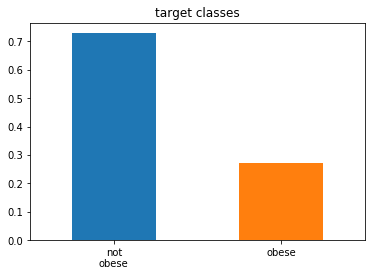

In [25]:
# How many considered obese?
ax = df['obese'].value_counts(normalize=True * 100).plot(kind='bar')
ax.set_xticklabels(['not\nobese', 'obese'], rotation=0)
ax.set_title('target classes');

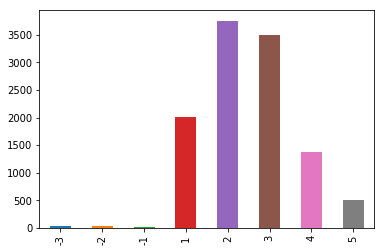

In [26]:
# what's the distribution of genHealth
df['genHealth'].value_counts().sort_index().plot(kind='bar')

# we got -3 (refuse to answer), -2 (don't know), and -1 (blank)

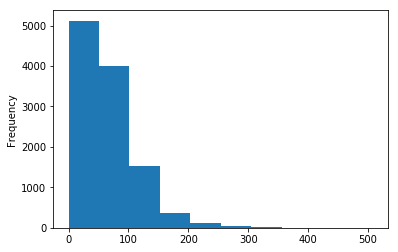

In [27]:
# what's the distribution of timeEat
df['timeEat'].plot(kind='hist')

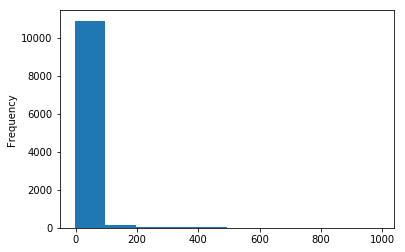

In [28]:
# what's the distribution of timeEat
df['timeSnack'].plot(kind='hist')

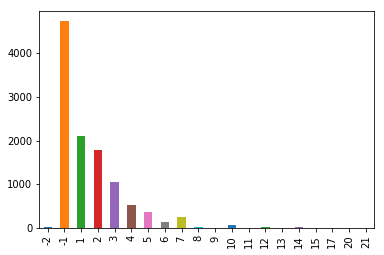

In [29]:
# what's the distribution of fastfdFreq
df['fastfdFreq'].value_counts().sort_index().plot(kind='bar')

# we got negatives: -1 (blank) and -2 (don't know)

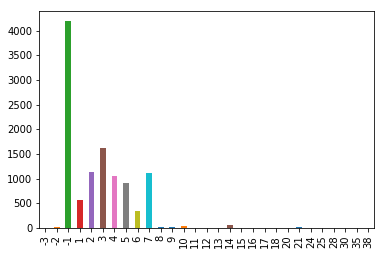

In [30]:
# what's the distribution of exerciseFreq
df['exerciseFreq'].value_counts().sort_index().plot(kind='bar')

# we got negatives: -1 (blank), -2 (don't know), and -3 (refuse to answer)

### Cleaning entries in features

- Convert -1 into 0
- Remove -2 (dont know) and -3 (refuse to answer)  

In [31]:
# Remove negatives in 'genHealth' and 'timeSnack'
maskGenHealth = df.genHealth <0
maskTimeSnack = df.timeSnack <0
df = df.loc[~maskGenHealth & ~maskTimeSnack]

In [32]:
# Remove negative in 'fastfdFrq'
maskFastFdFreq = df.fastfdFreq == -2
maskExerciseFreq = df.exerciseFreq ==-2
df = df.loc[~maskFastFdFreq]
df = df.loc[~maskExerciseFreq]

Turn -1's in _fastfoodFreq_ and _exerciseFreq_ into 0's

In [33]:
# Turn -1 into 0. 
df['fastfdFreq']= df.fastfdFreq.replace(-1, 0) 
df['exerciseFreq']= df.exerciseFreq.replace(-1,0)

Current dataframe information:

### Saving dataframe as pickle object
- this pickled file will be used in the next step (downstream) 

In [34]:
filename = 'cleanedData.pkl'
with open(f'../data/processed/{filename}', 'wb') as fout:
    pickle.dump(df, fout)

---